**Part 1: Preparing the data set**

In [0]:
#Loading the IRIS Dataset & Printing the 
from sklearn.datasets import load_iris
iris=load_iris()

In [2]:
#Printing the type of outputs
print(iris.target_names)
print(set(iris.target))

['setosa' 'versicolor' 'virginica']
{0, 1, 2}


In [3]:
#Printing the whole dataset
import pandas as pd
iris_dataset = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_dataset["Flower_Type"] = iris.target
iris_dataset

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Flower_Type
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [0]:
#Seperating the data into dependent and independent variables
X=iris.data
y=iris.target

In [0]:
#Normalizing the data and splitting into testing and training data set.
from sklearn.model_selection import train_test_split
import pandas as pd
from scipy.stats import zscore
X_Zscore = pd.DataFrame(X).apply(zscore)
X_Zscore = X_Zscore.to_numpy()
X_train,X_test,y_train,y_test=train_test_split(X_Zscore,y,test_size=0.2)

**Part 2: Defining functions for different Algorithms**

NOTE: In all the functions used to train and produce results for various algorithms,
one paramete caller "print_flag" is used with value (0 or 1). If value is 1 then function will also print Test values
and predicted values for comparison. If 0 then it will only return accuracy_score. By default it is made 0 in order to keep
the results produced compact. While calling individual functions, one can change it to 1 to more detailed analysis.

In [0]:
#Defining logistic regression function
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score
def training_function_LogisticRegression(x_train, y_train,x_test,y_test, print_flag=0):
    my_model = LogisticRegression(solver = 'lbfgs',multi_class = 'auto')
    my_model.fit(x_train, y_train)
    y_pred = my_model.predict(x_test)
    
    if(print_flag == 1):
        print(('Pred values: %s'%y_pred))
        print(('Test values: %s'%y_test))  
        print ('Accuracy of Logistic Regression on test set: {:.2f}'.format(metrics.accuracy_score(y_test,y_pred)))
        print('------------------------------------------------')
    
    
    return (metrics.accuracy_score(y_test,y_pred))


In [0]:
#Defining KNN function
from sklearn.neighbors import KNeighborsClassifier
def training_function_KNN(x_train, y_train,x_test,y_test,neighbours, print_flag=0):
    my_model = KNeighborsClassifier(n_neighbors = neighbours)
    my_model.fit(x_train, y_train)
    y_pred = my_model.predict(x_test)
    
    if(print_flag == 1):
        print(('Pred values: %s'%y_pred))
        print(('Test values: %s'%y_test))
        print('Accuracy of KNN on test set: {:.2f}'.format(metrics.accuracy_score(y_test,y_pred)))
        print('------------------------------------------------')
        
        
        
    return (metrics.accuracy_score(y_test,y_pred))


In [0]:
#Defining fuction for SVM model
from sklearn.svm import SVC
def training_function_SVM(x_train, y_train,x_test,y_test,kernel_name, print_flag=0):
    my_model = SVC(kernel = kernel_name,probability=True)
    my_model.fit(x_train, y_train)
    y_pred = my_model.predict(x_test)
    
    if(print_flag == 1):
        print(('Pred values: %s'%y_pred))
        print(('Test values: %s'%y_test))
        print('Accuracy of SVM on test set: {:.2f}'.format(metrics.accuracy_score(y_test,y_pred)))
        print('------------------------------------------------')
    
    
    return (metrics.accuracy_score(y_test,y_pred))



In [0]:
#Defining fuction for XGBoost model
from xgboost import XGBClassifier
def training_function_XGBoost(x_train, y_train,x_test,y_test, print_flag=0):
    my_model = XGBClassifier()
    my_model.fit(x_train, y_train)
    y_pred = my_model.predict(x_test)
    
    if(print_flag == 1):
        print(('Pred values: %s'%y_pred))
        print(('Test values: %s'%y_test))
        print('Accuracy of XGBoost on test set: {:.2f}'.format(metrics.accuracy_score(y_test,y_pred)))
        print('------------------------------------------------')
        
        
    return (metrics.accuracy_score(y_test,y_pred))


In [0]:
#Defining fuction for Naive Bayes algorithm
from sklearn.naive_bayes import GaussianNB
def training_function_GaussianNB(x_train, y_train,x_test,y_test, print_flag=0):
    my_model = GaussianNB()
    y_pred = my_model.fit(x_train, y_train).predict(x_test)
    
    
    if(print_flag == 1):
        print(('Pred values: %s'%y_pred))
        print(('Test values: %s'%y_test))
        print('Accuracy of Naive Bayes Classifier on test set: {:.2f}'.format(metrics.accuracy_score(y_test,y_pred)))
        print('------------------------------------------------')
        
        
        
    return (metrics.accuracy_score(y_test,y_pred))


In [0]:
#Defining fuction for Stochastic gradient descent
from sklearn.linear_model import SGDClassifier
def training_function_SGDClassifier(x_train, y_train,x_test,y_test, print_flag=0):
    my_model = SGDClassifier(loss = 'modified_huber', shuffle = True, random_state = 101)
    y_pred = my_model.fit(x_train, y_train).predict(x_test)
    
    
    if(print_flag == 1):
        print(('Pred values: %s'%y_pred))
        print(('Test values: %s'%y_test))
        print('Accuracy of SGDClassifier on test set: {:.2f}'.format(metrics.accuracy_score(y_test,y_pred)))
        print('------------------------------------------------')
    
    
    return (metrics.accuracy_score(y_test,y_pred))


In [0]:
#Defining fuction for Decision Tree
from sklearn.tree import DecisionTreeClassifier
def training_function_DecisionTree(x_train, y_train,x_test,y_test, print_flag=0):
    my_model = DecisionTreeClassifier(max_depth = 10, random_state=101,
                              max_features = None, min_samples_leaf = 15)
    y_pred = my_model.fit(x_train, y_train).predict(x_test)
    
    if(print_flag == 1):
        print(('Pred values: %s'%y_pred))
        print(('Test values: %s'%y_test))
        print('Accuracy of DecisionTree classifier on test set: {:.2f}'.format(metrics.accuracy_score(y_test,y_pred)))
        print('------------------------------------------------')
  

    return (metrics.accuracy_score(y_test,y_pred))


In [0]:
#Defining fuction for Random Forest
from sklearn.ensemble import RandomForestClassifier
def training_function_RandomForest(x_train, y_train,x_test,y_test, print_flag=0):
    my_model = RandomForestClassifier(n_estimators = 70, oob_score = True, 
                            n_jobs = -1, random_state = 101,
                            max_features = None, min_samples_leaf = 30)
    y_pred = my_model.fit(x_train, y_train).predict(x_test)
    
    
    if(print_flag == 1):
        print(('Pred values: %s'%y_pred))
        print(('Test values: %s'%y_test))
        print('Accuracy of Random forest classifier on test set: {:.2f}'.format(metrics.accuracy_score(y_test,y_pred)))
        print('------------------------------------------------')

    
    return (metrics.accuracy_score(y_test,y_pred))

**Part 3: Training and validation phase**

In [0]:
#Defining a function in order to insert random noise into the training data set
# n - defines the level of noise
import numpy as np
def random_number_addition(n):
    data = X_train.copy()
    for i in range(len(X_train)):
        for j in range(len(X_train[i])):
            data[i][j] = X_train[i][j] + n*(1-2*np.random.rand())
    return data


In [0]:
#This function caluclates the average accuracy scores over 100 epochs for all the algorithms at every level of noise
# This function returns four types of values
# Level_error: List of Mean accuracies for every level of attribute noise for every algorithm

# Below three variables are used while plotting boxplots
# Accuracies: List of accuracy at every epoch for every level of attribute noise for every algorithm
# Level_name: List of attribute noise level at every epoch for every level of attribute noise for every algorithm
# Algo_name: List of algorithms used at every epoch for every level of attribute noise for every algorithm

def different_error_levels(input): #Input is upto how many levels of noise we want to get the results
    Accuracies = []
    Level_name = []
    Algo_name = []
    Algorithms = ['LogisticRegression','KNN','SVM','DecisionTree','RandomForest','SGDClassifier','GaussianNB','XGBoost']
    Level_error = [] # This is a list of lists which contains mean errors for each level of noise for all the used algorithms
    for i in range((input+1)): 
        level = i
        k = []
        for cnt in range(100): # For every level of noise, code is run 100 times and its average is taken
            X_train_new = random_number_addition(level)
            Errors = [
            training_function_LogisticRegression(X_train_new,y_train,X_test,y_test).round(2),
            training_function_KNN(X_train_new,y_train,X_test,y_test,3).round(2),
            training_function_SVM(X_train_new,y_train,X_test,y_test,'linear').round(2) ,
            training_function_DecisionTree(X_train_new,y_train,X_test,y_test).round(2) ,
            training_function_RandomForest(X_train_new,y_train,X_test,y_test).round(2) ,
            training_function_SGDClassifier(X_train_new,y_train,X_test,y_test).round(2),
            training_function_GaussianNB(X_train_new,y_train,X_test,y_test).round(2) ,
            training_function_XGBoost(X_train_new,y_train,X_test,y_test).round(2)
           ]
            k.append(Errors)
            Accuracies.append(Errors)
            Level_name.append(['Level_'+str(level)]*8)
            Algo_name.append(Algorithms)
            
        mean_error = np.mean(k, axis = 0) #Calculates mean error for all algorithnms for a partular level of noise
            
        Level_error.append(mean_error)
    return Level_error,Accuracies,Level_name,Algo_name

In [0]:
#This code is used to get accuracy scores for various noise levels
# Calling the above function (NOTE: This will take time to execute based on number of levels used)

Total_error_levels = 10 #Change this variable to get data upto any level of noise
Level_error,Accuracies,Level_name,Algo_name = different_error_levels(Total_error_levels) # Calling the above function (NOTE: This will take time to execute based on number of levels used)
Algorithms = [ 'Logistic Regression','KNN','SVM','DecisionTree','RandomForest','SGDClassifier','GaussianNB','XGBoost'] 
df = pd.DataFrame(Algorithms, columns =['Algorithms'])



In [17]:
#Printing the dataframe
for i in range(Total_error_levels+1):
    df['Level_'+str(i)] = Level_error[i].round(2)
df= df.set_index('Algorithms')
df

,Level_0,Level_1,Level_2,Level_3,Level_4,Level_5,Level_6,Level_7,Level_8,Level_9,Level_10
Algorithms,,,,,,,,,,,
Logistic Regression,0.93,0.90,0.85,0.81,0.71,0.64,0.58,0.53,0.49,0.45,0.42
KNN,0.93,0.82,0.62,0.41,0.34,0.33,0.32,0.34,0.33,0.31,0.32
SVM,0.97,0.90,0.85,0.80,0.71,0.64,0.58,0.53,0.49,0.44,0.41
DecisionTree,0.90,0.85,0.70,0.53,0.42,0.39,0.36,0.34,0.33,0.34,0.32
RandomForest,0.93,0.66,0.77,0.69,0.57,0.58,0.53,0.47,0.43,0.40,0.37
SGDClassifier,0.93,0.82,0.76,0.64,0.61,0.61,0.53,0.45,0.46,0.46,0.42
GaussianNB,0.93,0.87,0.85,0.81,0.69,0.66,0.55,0.51,0.47,0.43,0.41
XGBoost,0.90,0.85,0.65,0.48,0.37,0.38,0.33,0.34,0.33,0.32,0.32


**Part 4: Plotting the results**

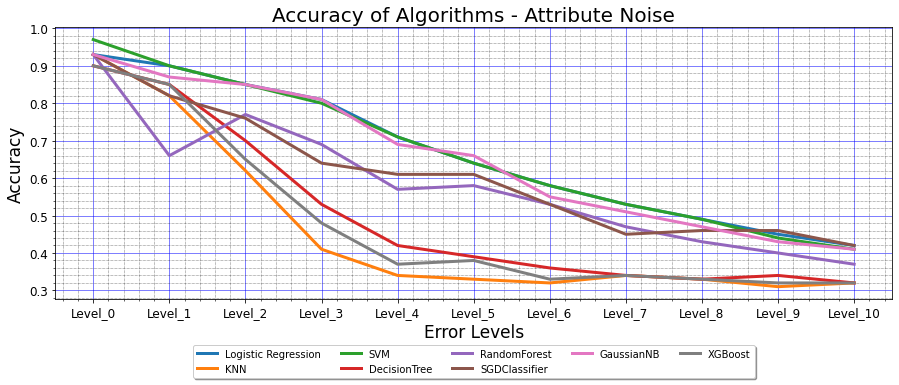

In [18]:
#Plotting the line graph for various noise levels
import matplotlib.pyplot as plt
n = Total_error_levels
plt.figure(figsize=(n+5,n/2))
for i in Algorithms:
    plt.plot(df.loc[i,:], label=i, linewidth=3)


plt.grid(which='major', linestyle='-', linewidth='0.5', color='blue')
plt.minorticks_on()
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.title("Accuracy of Algorithms - Attribute Noise",fontsize='20')
plt.xlabel('Error Levels',fontsize='17')
plt.ylabel('Accuracy',fontsize='17')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
          fancybox=True, shadow=True, ncol=5)


**Part 5: Generating barplots**

In [19]:
# The three variable generated in different_error_levels(input) function are combined to form a dataframe
dm = pd.DataFrame()
dm['Accuracies'] = sum(Accuracies,[])
dm['Attribute_Noise_Levels'] = sum(Level_name,[])
dm['Algos'] = sum(Algo_name,[])
dm 

,Accuracies,Attribute_Noise_Levels,Algos
0,0.93,Level_0,LogisticRegression
1,0.93,Level_0,KNN
2,0.97,Level_0,SVM
3,0.90,Level_0,DecisionTree
4,0.93,Level_0,RandomForest
...,...,...,...
8795,0.30,Level_10,DecisionTree
8796,0.30,Level_10,RandomForest
8797,0.07,Level_10,SGDClassifier
8798,0.20,Level_10,GaussianNB


In [20]:
#Selecting the levels of noise for box plots
#This piece of code needs user input

def get_n_levels():
  n_levels = input ("Enter the number of levels "+str(Total_error_levels+1)+" :")
  levels = []
  for i in range(int(n_levels)):
    s = input("Enter the level number from 0 to "+str(Total_error_levels)+" :")
    levels.append("Level_"+str(s))  
  return (levels)


ans = 's'
levels = []
while(ans != "Y" and ans !="EXIT"):
  lev = []
  lev = get_n_levels()
  print(lev)
  ans = input(print(''' Do you want above levels: Y/N
  OR
  Enter EXIT to move out. '''))
  ans = ans.upper()
  levels = lev


Enter the number of levels 11 :11
Enter the level number from 0 to 10 :0
Enter the level number from 0 to 10 :1
Enter the level number from 0 to 10 :2
Enter the level number from 0 to 10 :3
Enter the level number from 0 to 10 :4
Enter the level number from 0 to 10 :5
Enter the level number from 0 to 10 :6
Enter the level number from 0 to 10 :7
Enter the level number from 0 to 10 :8
Enter the level number from 0 to 10 :9
Enter the level number from 0 to 10 :10
['Level_0', 'Level_1', 'Level_2', 'Level_3', 'Level_4', 'Level_5', 'Level_6', 'Level_7', 'Level_8', 'Level_9', 'Level_10']
 Do you want above levels: Y/N
  OR
  Enter EXIT to move out. 
y


In [21]:
#Selecting the Algorithms for box plots
#This piece of code needs user input

Algos = {1:'LogisticRegression',
         2:'KNN',
         3:'SVM',
         4:'DecisionTree',
         5:'RandomForest',
         6:'SGDClassifier',
         7:'GaussianNB',
         8:'XGBoost'}
print("Following Algos are availale:")
for i in Algos:
  print(str(i)+':'+Algos[i])


def get_algos():
  B_algos = []
  n_algos = input ("Enter the number of algos: ")
  for i in range(int(n_algos)):
    s = int(input("Enter the algo number: "))
    B_algos.append(Algos[s])
  return B_algos


ans = 's'
Box_algos = []
while(ans != "Y" and ans !="EXIT"):
  b = []
  b = get_algos()
  print(b)
  ans = input(print(''' Do you want above Algorithms in boxplots: Y/N
  OR 
  Enter EXIT to move out. '''))
  ans = ans.upper()
  Box_algos = b



Following Algos are availale:
1:LogisticRegression
2:KNN
3:SVM
4:DecisionTree
5:RandomForest
6:SGDClassifier
7:GaussianNB
8:XGBoost
Enter the number of algos: 8
Enter the algo number: 1
Enter the algo number: 2
Enter the algo number: 3
Enter the algo number: 4
Enter the algo number: 5
Enter the algo number: 6
Enter the algo number: 7
Enter the algo number: 8
['LogisticRegression', 'KNN', 'SVM', 'DecisionTree', 'RandomForest', 'SGDClassifier', 'GaussianNB', 'XGBoost']
 Do you want above Algorithms in boxplots: Y/N
  OR 
  Enter EXIT to move out. 
y


In [22]:
print("Algos used in Box plots: ",Box_algos)
print("Levels of noise used in Box plots: ",levels)

Algos used in Box plots:  ['LogisticRegression', 'KNN', 'SVM', 'DecisionTree', 'RandomForest', 'SGDClassifier', 'GaussianNB', 'XGBoost']
Levels of noise used in Box plots:  ['Level_0', 'Level_1', 'Level_2', 'Level_3', 'Level_4', 'Level_5', 'Level_6', 'Level_7', 'Level_8', 'Level_9', 'Level_10']


In [23]:
#Selecting the data based on the levels and Algos to be used in boxplots
box_data = dm[dm['Algos'].isin(Box_algos) & dm['Attribute_Noise_Levels'].isin(levels)]
box_data

,Accuracies,Attribute_Noise_Levels,Algos
0,0.93,Level_0,LogisticRegression
1,0.93,Level_0,KNN
2,0.97,Level_0,SVM
3,0.90,Level_0,DecisionTree
4,0.93,Level_0,RandomForest
...,...,...,...
8795,0.30,Level_10,DecisionTree
8796,0.30,Level_10,RandomForest
8797,0.07,Level_10,SGDClassifier
8798,0.20,Level_10,GaussianNB


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


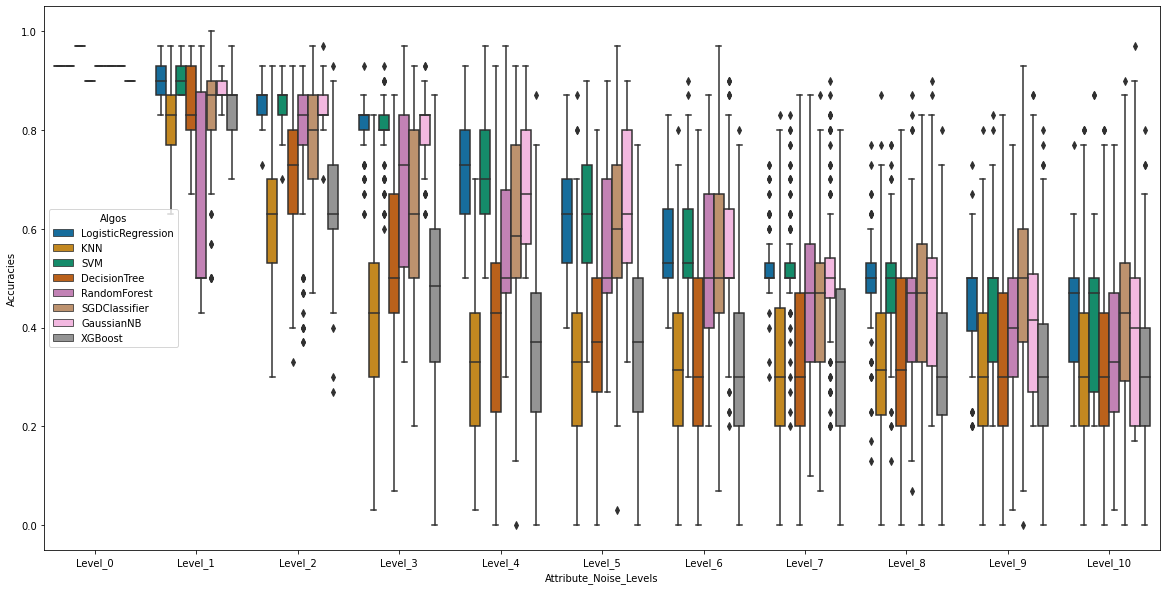

In [24]:
#Plotting the box plots of the selected data
import seaborn as sns
plt.figure(figsize=(20,10))
sns.boxplot(y='Accuracies', x='Attribute_Noise_Levels', 
                 data=box_data, 
                 palette="colorblind",
                 hue='Algos')